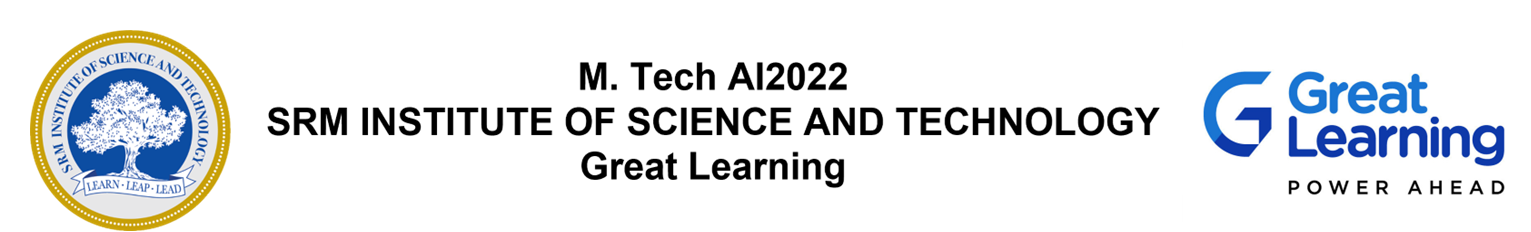

<div style='text-align: center; font-family: Helvetica Neue; font-size: 20px;'><b>Mini Project 02 - 20PAIE51J Machine Learning - Unsupervised model</b></div><br>


<div style='text-align: center; font-family: Helvetica Neue; font-size: 20px;'><b>DBSCAN Clustering & Fuzzy Clustering in Country DataSet</b></div><br>


<div style='text-align: center; font-family: Helvetica Neue; font-size: 24px;'><b>Gokulram Sivandhan | Bharath K M | G.Krishna Kumar</b></div><br>

<div style='text-align: center; font-family: Helvetica Neue; font-size: 16px;'><b>Note - Pandas version used - 1.3.4</b></div>

## Table of Content

1. **[Import required Library](#imp)**
2. **[Data Preparation](#prep)**
    - 2.1 - **[Read the Data](#read)**
    - 2.2 - **[correlation map](#corr)**
    - 2.3 - **[correlated features scatter plot](#corr_scat)**  
    - 2.4 - **[Elbow Method to find Optimal Clusters](#elb)**
    - 2.5 - **[Elbow Curve](#elbcurv)**
    
3. **[DBSCAN Algorithm](#dbs)**
4. **[Cluster Plot using DBSCAN](#dbscl)**
5. **[Fuzzy C Means Clustering](#fuzzy)**
    - 5.1 - **[Label Encoding](#lbl)**
    - 5.2 - **[correlation map](#corrm)**
    - 5.3 - **[Dataset Scaling](#datsc)**  
    - 5.4 - **[Apply Fuzzy C-Means Algorithm](#fucz)**

<a id="imp"></a>
# 1. Importing required libraries

Define the Required Libraries for this problem. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math


import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [25, 10]
plt.rcParams.update({'font.size': 25})

from sklearn import datasets,metrics
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

<a id="prep"></a>
# 2. Data Preparation

<a id="read"></a>
## 2.1 Read the Data

Open the CSV file and display the statistical information about the dataset 

In [2]:
country = pd.read_csv('Country-data.csv')
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
country.shape

(167, 10)

<span style="color:blue"> <b> <u>INTERPRETATION :</u> <br> 167 rows & 10 columns.<br>
<br>

In [4]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


<span style="color:blue"> <b> <u>INTERPRETATION :</u> <br> one categorical variables named 'country', seven numerical variables as float(child_mort,exports,health,imports,inflation,life_expec & total_fer) and two numercal variables as integer(income & gdpp ).<br>
<br>

In [5]:
country.describe().applymap('{:,.2f}'.format)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00
mean,38.27,41.11,6.82,46.89,"17,144.69",7.78,70.56,2.95,"12,964.16"
std,40.33,27.41,2.75,24.21,"19,278.07",10.57,8.89,1.51,"18,328.70"
min,2.60,0.11,1.81,0.07,609.00,-4.21,32.10,1.15,231.00
25%,8.25,23.80,4.92,30.20,"3,355.00",1.81,65.30,1.79,"1,330.00"
50%,19.30,35.00,6.32,43.30,"9,960.00",5.39,73.10,2.41,"4,660.00"
75%,62.10,51.35,8.60,58.75,"22,800.00",10.75,76.80,3.88,"14,050.00"
max,208.00,200.00,17.90,174.00,"125,000.00",104.00,82.80,7.49,"105,000.00"


<a id="corr"></a>
## 2.2 correlation map

Print the correlation map and find the most related features.

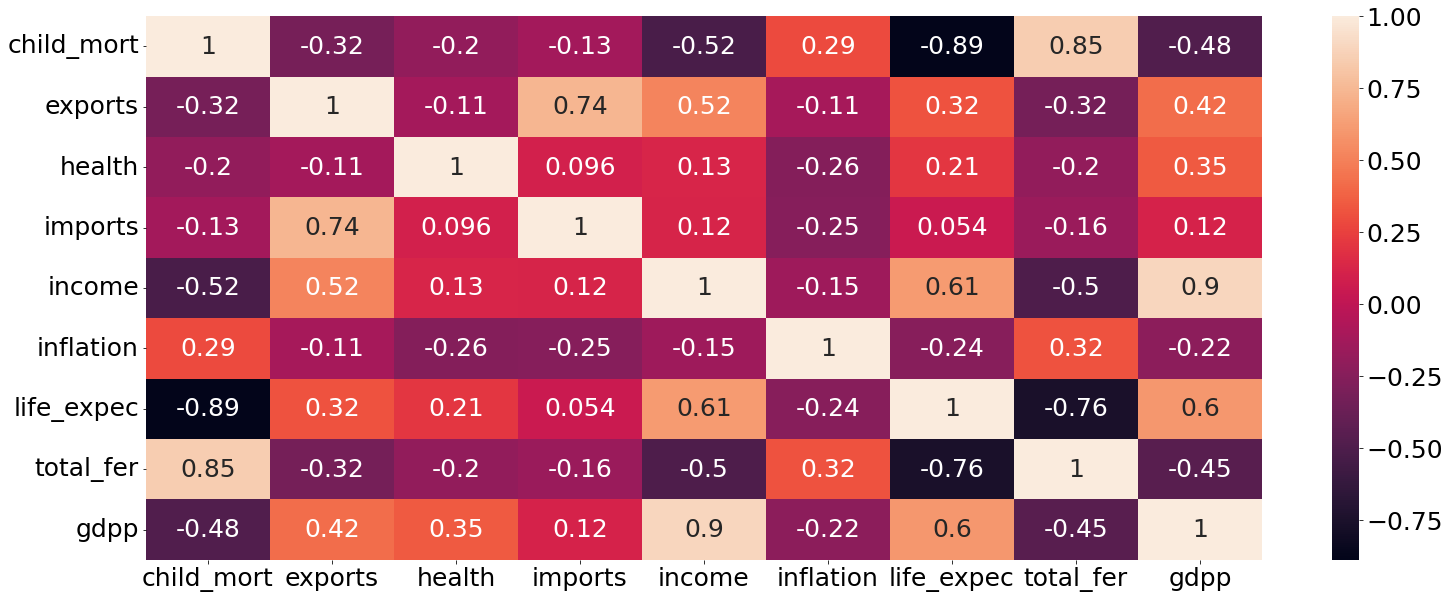

In [6]:
df=country
# Correlation map
corr = df.corr()
sns.heatmap(corr, annot=True)

# Find most related features
threshold = 0.5
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
df.drop(to_drop, axis=1, inplace=True)

In [7]:
df.head()

,country,child_mort,exports,health,inflation
0,Afghanistan,90.2,10.0,7.58,9.44
1,Albania,16.6,28.0,6.55,4.49
2,Algeria,27.3,38.4,4.17,16.10
3,Angola,119.0,62.3,2.85,22.40
4,Antigua and Barbuda,10.3,45.5,6.03,1.44


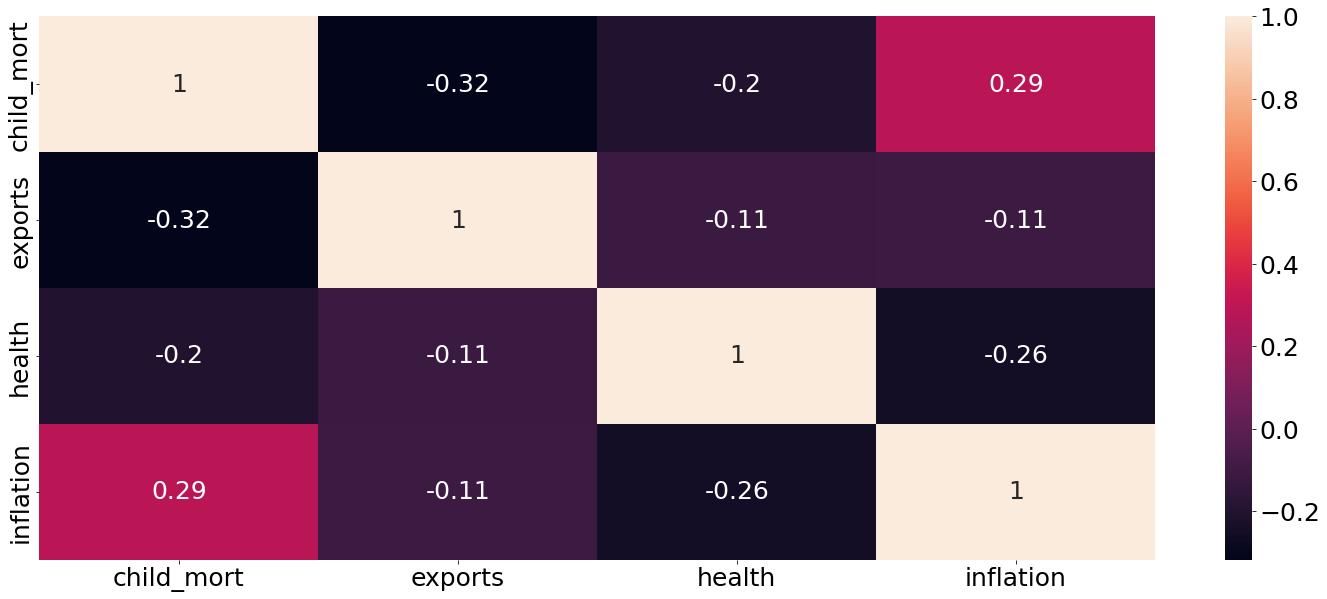

In [8]:
# Correlation map
corr = df.corr()

# Plot heatmap of correlation matrix
sns.heatmap(corr, annot=True)
plt.show()

<span style="color:blue"> <b> <u>INTERPRETATION :</u> <br> country, child_mort, exports, health and inflation are the most related features.<br>
<br>

<a id="corr_scat"></a>
## 2.3 correlated features scatter plot

Plot a graph with the correlated features.

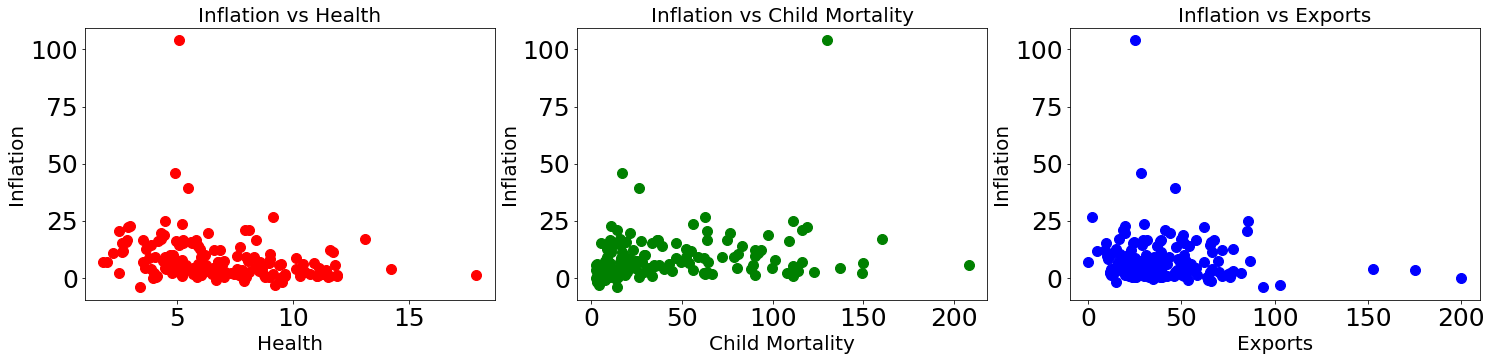

In [9]:
# Plot three subplots having inflation and health, inflation and child_mort and inflation and exports
fig, axs = plt.subplots(1, 3, figsize=(25, 5))
axs[0].scatter(df['health'], df['inflation'], label='Health', s=100, color='red')
axs[0].set_xlabel('Health', fontsize=20)
axs[0].set_ylabel('Inflation', fontsize=20)
axs[0].set_title('Inflation vs Health', fontsize=20)

axs[1].scatter(df['child_mort'], df['inflation'], label='Child Mortality', s=100, color='green')
axs[1].set_xlabel('Child Mortality', fontsize=20)
axs[1].set_ylabel('Inflation', fontsize=20)
axs[1].set_title('Inflation vs Child Mortality', fontsize=20)

axs[2].scatter(df['exports'], df['inflation'], label='Exports', s=100, color='blue')
axs[2].set_xlabel('Exports', fontsize=20)
axs[2].set_ylabel('Inflation', fontsize=20)
axs[2].set_title('Inflation vs Exports', fontsize=20)

plt.show()

<a id="elb"></a>
## 2.4 Elbow Method to find Optimal Clusters

Apply Elbow Method to find optimal clusters. 

In [10]:
# Drop 'country' column
df = df.drop('country', axis=1)

# Convert dataframe to numpy array
X = df.values

# Find optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Print optimal cluster
optimal_cluster = ...
print(f"Optimal cluster: {optimal_cluster}")

# print interpretations based on if condition
if kmeans.inertia_ < 100:
    print("The optimal number of clusters is 1.")
elif kmeans.inertia_ < 200:
    print("The optimal number of clusters is 2.")
elif kmeans.inertia_ < 300:
    print("The optimal number of clusters is 3.")
else:
    print("The optimal number of clusters is 4.")

Optimal cluster: Ellipsis
The optimal number of clusters is 4.


<span style="color:blue"> <b> <u>INTERPRETATION :</u> <br> Optimal cluster: Ellipsis.<br>
The optimal number of clusters is 4.<br>

<a id="elbcurv"></a>
## 2.5 Elbow Curve

Plot Elbow curve

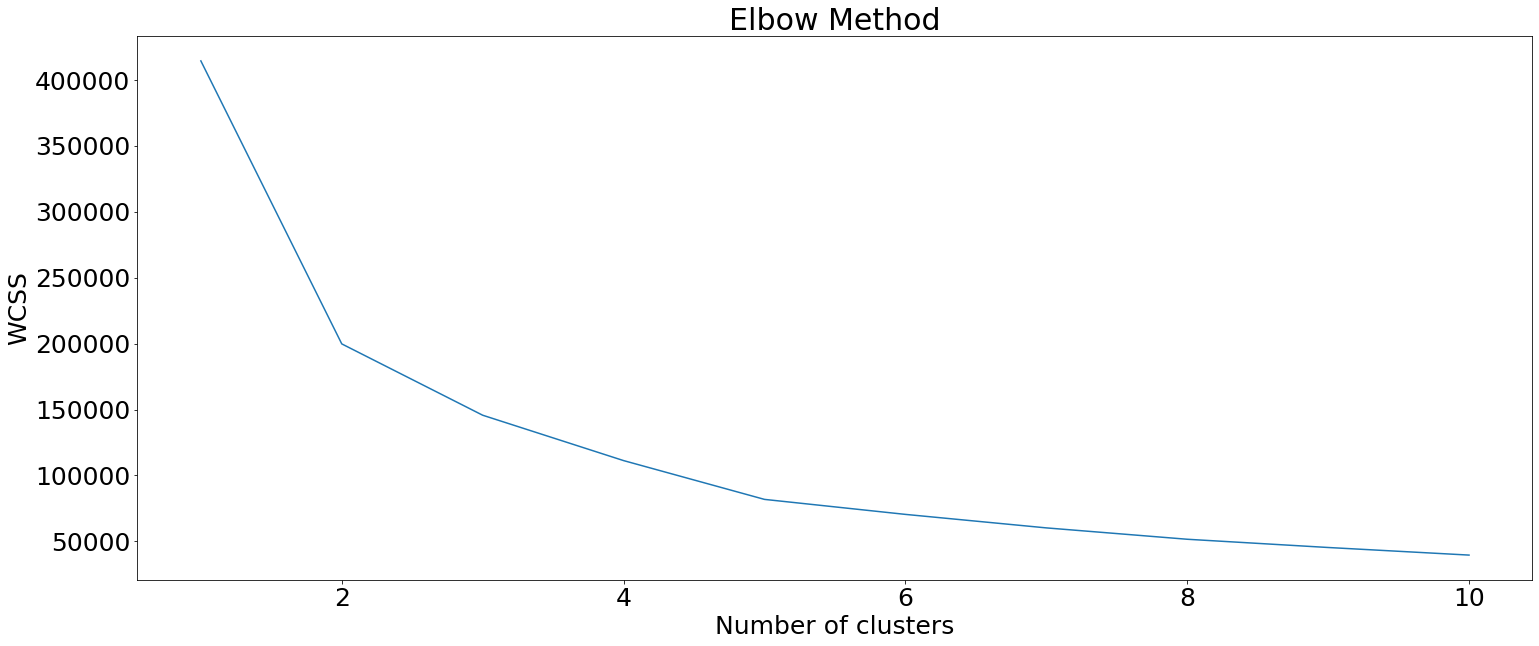

In [11]:
# elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

<a id="dbs"></a>
## 3. DBSCAN Algorithm

Apply DBSCAN to find optimal eps and minpts. 

In [12]:
X = df.values
X, y = make_blobs(n_samples=1000, centers=5, random_state=42)
X = StandardScaler().fit_transform(X)

dbscan = DBSCAN(eps=0.4, min_samples=2)
dbscan.fit(X)

DBSCAN(eps=0.4, min_samples=2)

<span style="color:blue"> <b> <u>INTERPRETATION :</u> <br> Best eps=0.4, Best min_samples=2<br>

<a id="dbscl"></a>
## 4. Cluster Plot using DBSCAN

Plot the DBSCAN clustered datapoints using scatter plot.

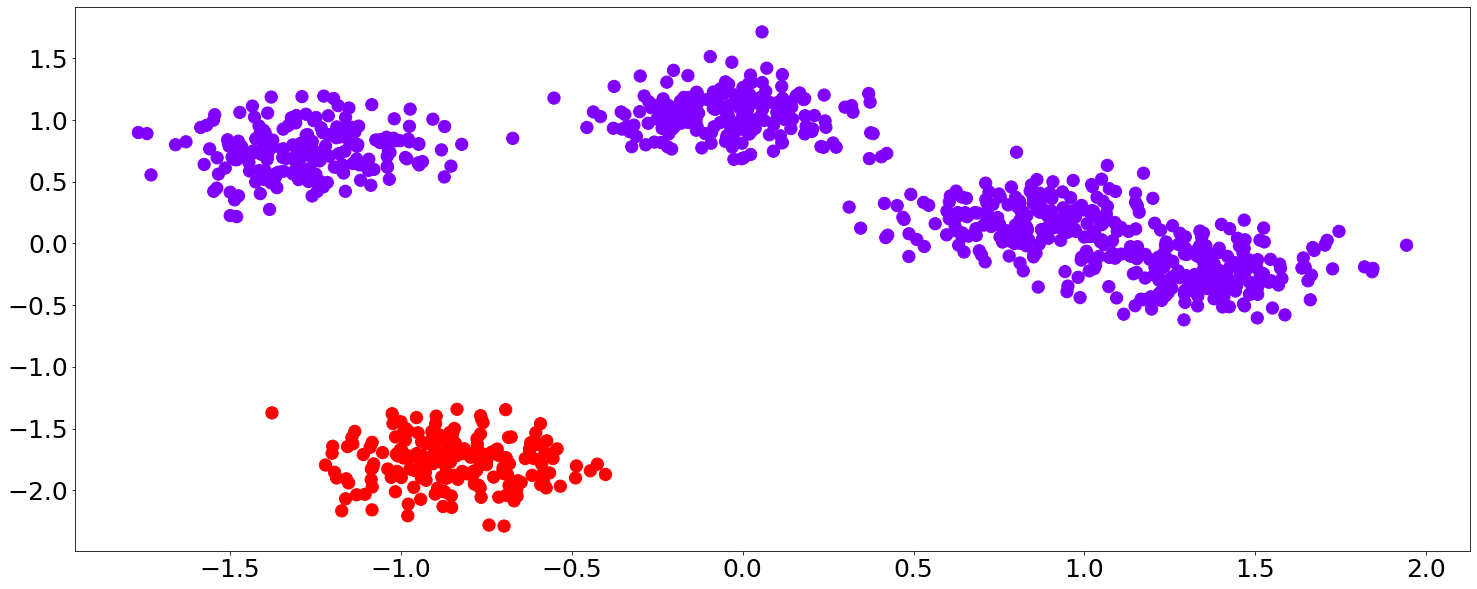

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, cmap='rainbow', s=150)
plt.show()

<a id="fuzzy"></a>
## 5. Fuzzy C Means Clustering

Apply **Fuzzy C Means Clustering** for the Country Status DataSet. It contains the following data fields: country, child_mort, exports, health, imports, income, inflation, life_expec, total_fer, gdpp

Define the Required Libraries for this problem. 

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm


import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [25, 10]
plt.rcParams.update({'font.size': 25})

from sklearn import datasets,metrics
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from skfuzzy.cluster import cmeans
from scipy.cluster.hierarchy import dendrogram
from fcmeans import FCM
from sklearn.metrics import pairwise_distances_argmin_min
from scipy.spatial.distance import cdist

Open the CSV file and display the statistical information about the dataset

In [15]:
df3 = pd.read_csv('Country-data.csv')
df3.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [16]:
df3.shape

(167, 10)

In [17]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [18]:
df3.describe().applymap('{:,.2f}'.format)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00
mean,38.27,41.11,6.82,46.89,"17,144.69",7.78,70.56,2.95,"12,964.16"
std,40.33,27.41,2.75,24.21,"19,278.07",10.57,8.89,1.51,"18,328.70"
min,2.60,0.11,1.81,0.07,609.00,-4.21,32.10,1.15,231.00
25%,8.25,23.80,4.92,30.20,"3,355.00",1.81,65.30,1.79,"1,330.00"
50%,19.30,35.00,6.32,43.30,"9,960.00",5.39,73.10,2.41,"4,660.00"
75%,62.10,51.35,8.60,58.75,"22,800.00",10.75,76.80,3.88,"14,050.00"
max,208.00,200.00,17.90,174.00,"125,000.00",104.00,82.80,7.49,"105,000.00"


<a id="lbl"></a>
## 5.1 Label Encoding

Label encode the country field from the dataset.

In [19]:
le = LabelEncoder()
df3['country'] = le.fit_transform(df3['country'])

In [20]:
df3.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


<a id="corrm"></a>
## 5.2 Correlation map

Print the correlation map and find the most related features.

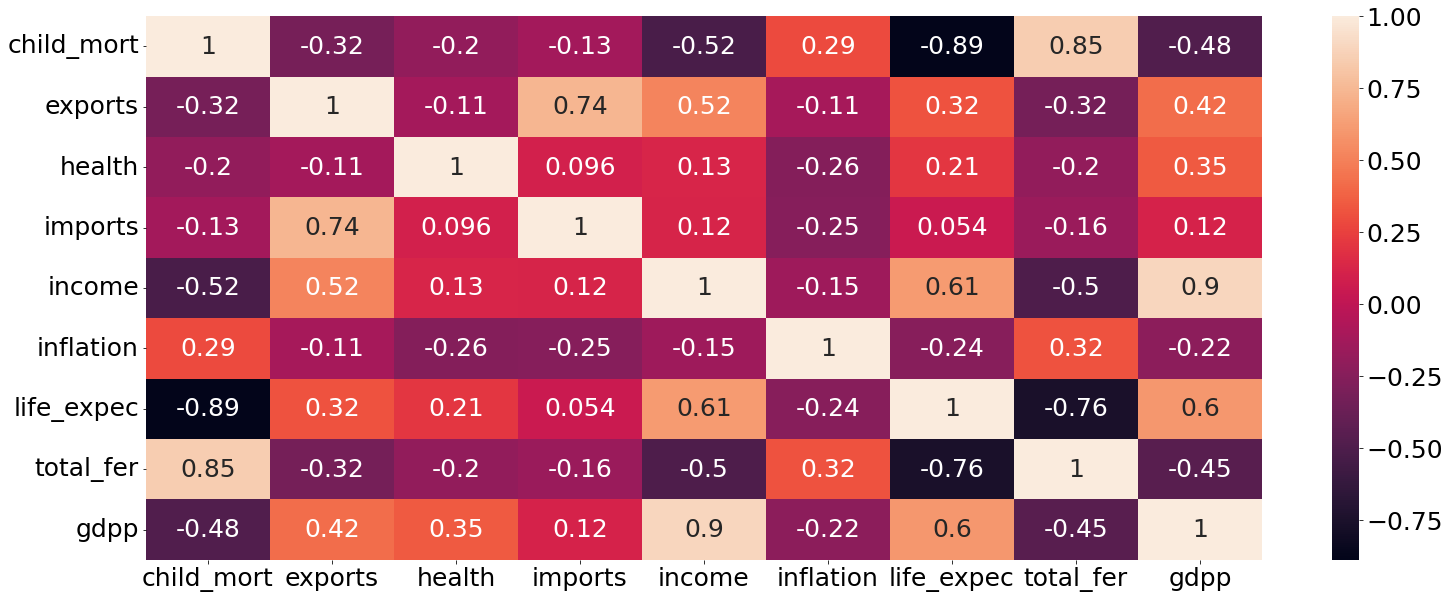

In [21]:
df4 = df3.drop('country', axis=1)
# Correlation map
corr = df4.corr()
sns.heatmap(corr, annot=True)

# Find most related features
threshold = 0.5
corr_matrix = df4.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
df4.drop(to_drop, axis=1, inplace=True)

In [22]:
df4.head()

,child_mort,exports,health,inflation
0,90.2,10.0,7.58,9.44
1,16.6,28.0,6.55,4.49
2,27.3,38.4,4.17,16.10
3,119.0,62.3,2.85,22.40
4,10.3,45.5,6.03,1.44


<a id="datsc"></a>
## 5.3 Dataset Scaling

Scaling the dataset.

In [23]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df4)

<a id="fucz"></a>
## 5.4 Apply Fuzzy C-Means Algorithm

Apply Fuzzy C-Means Algorithm.

In [24]:
fuzzy = cmeans(scaled_features.T, 4, 2, error=0.005, maxiter=1000)[1]

Merge the predicted label with the dataframe.

In [25]:
df4['predicted_label'] = fuzzy.argmax(axis=0)

In [26]:
df4.head()

,child_mort,exports,health,inflation,predicted_label
0,90.2,10.0,7.58,9.44,2
1,16.6,28.0,6.55,4.49,0
2,27.3,38.4,4.17,16.10,0
3,119.0,62.3,2.85,22.40,2
4,10.3,45.5,6.03,1.44,3


Plot the Fuzzy C Means clustered datapoints using scatter plot.

Interpretation for cluster 1:
       child_mort    exports     health   inflation
count   43.000000  43.000000  43.000000   43.000000
mean    95.323256  25.272070   5.791628   12.403605
std     33.614827  16.121485   2.374684   15.927383
min     47.000000   0.109000   1.970000    0.885000
25%     69.350000  15.650000   4.475000    4.335000
50%     90.500000  22.600000   5.210000    9.200000
75%    112.500000  30.900000   6.665000   15.600000
max    208.000000  85.800000  13.100000  104.000000


Interpretation for cluster 2:
       child_mort     exports     health  inflation
count   68.000000   68.000000  68.000000  68.000000
mean    21.341176   53.948529   5.175294   8.387985
std     14.829119   32.749189   1.464289   8.531371
min      2.800000   12.400000   1.810000  -4.210000
25%     10.725000   31.600000   4.260000   2.815000
50%     17.400000   50.200000   5.200000   5.720000
75%     29.125000   65.625000   6.187500  13.500000
max     63.900000  200.000000   8.650000  45.900000




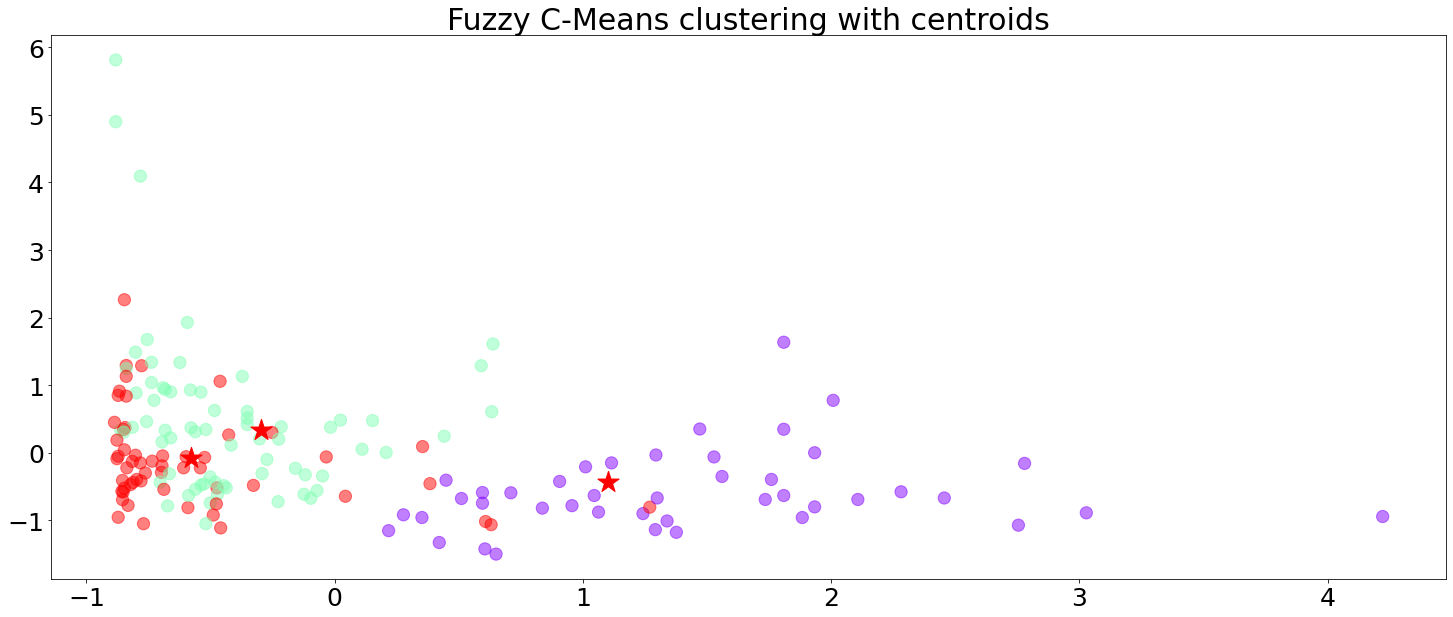

In [27]:
df5 = df4.drop('predicted_label', axis=1)
X=df5

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from fcmeans import FCM

fcm = FCM(n_clusters=3)
fcm.fit(X_scaled)

fcm_centers = fcm.centers
fcm_labels = fcm.u.argmax(axis=1)

for i in range(3):
    print(f"Interpretation for cluster {i+1}:")
    print(df5[fcm_labels == i].describe())
    print("\n")

# plot result
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=fcm_labels, alpha=.5, cmap='rainbow', s=150)
plt.scatter(fcm_centers[:,0], fcm_centers[:,1], marker="*", s=500, c='Red')
plt.title('Fuzzy C-Means clustering with centroids')
plt.show()

<span style="color:blue"> <b> <u>FINAL INTERPRETATIONS :</u> <br> 1 - country, child_mort, exports, health and inflation are the most related features.<br> 2 - Based on Elbow method, Optimal cluster is Ellipsis & optimal number of clusters is 4.<br> 3 - Based on DBSCAN, best eps=0.4, Best min_samples=2<br> 4 - Applied Fuzzy C means algorithm & created 3 clusters with centroids & printed five point summary<br>

# Thank You